# Shopping trends Analysis

## Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Importing datasets

In [5]:
df = pd.read_csv('./shopping_trends.csv', index_col="Customer ID")

In [6]:
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


## Exploratory Data Analysis

### Checking for NA Values

In [9]:
df.isna().sum()

Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

### Checking for null values

In [11]:
df.isnull().sum()

Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

### Distribution of Orders per category

In [13]:
orders_per_category = df["Category"].value_counts().sort_values(ascending=False)
print(orders_per_category)

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


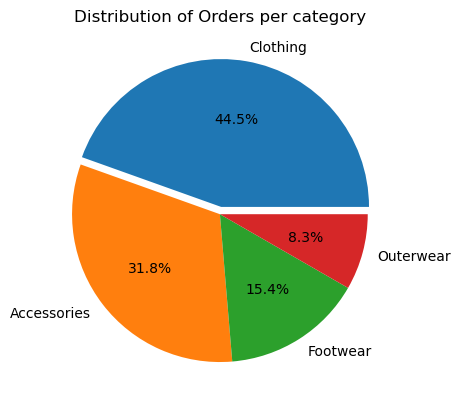

In [14]:
orders_per_category_plot = plt.figure(num=1)
plt.pie(orders_per_category, autopct="%1.1f%%", labels=orders_per_category.index.values, explode=(0.05,0,0,0))
plt.title("Distribution of Orders per category")
plt.show()

### Locations that placed the most and least number of orders

In [16]:
number_of_orders_per_location = df["Location"].value_counts().sort_values()
print(number_of_orders_per_location)

Location
Rhode Island      63
Kansas            63
Hawaii            65
Arizona           65
New Jersey        67
Florida           68
Iowa              69
South Dakota      70
New Hampshire     71
Utah              71
Wyoming           71
Massachusetts     72
Alaska            72
Washington        73
Michigan          73
Pennsylvania      74
Oregon            74
Wisconsin         75
Oklahoma          75
Colorado          75
South Carolina    76
Maine             77
Texas             77
Tennessee         77
Ohio              77
Virginia          77
North Carolina    78
Connecticut       78
Arkansas          79
Kentucky          79
Georgia           79
Indiana           79
Mississippi       80
New Mexico        81
West Virginia     81
Missouri          81
North Dakota      83
Louisiana         84
Vermont           85
Maryland          86
Delaware          86
Nevada            87
New York          87
Nebraska          87
Minnesota         88
Alabama           89
Illinois          92
Idah

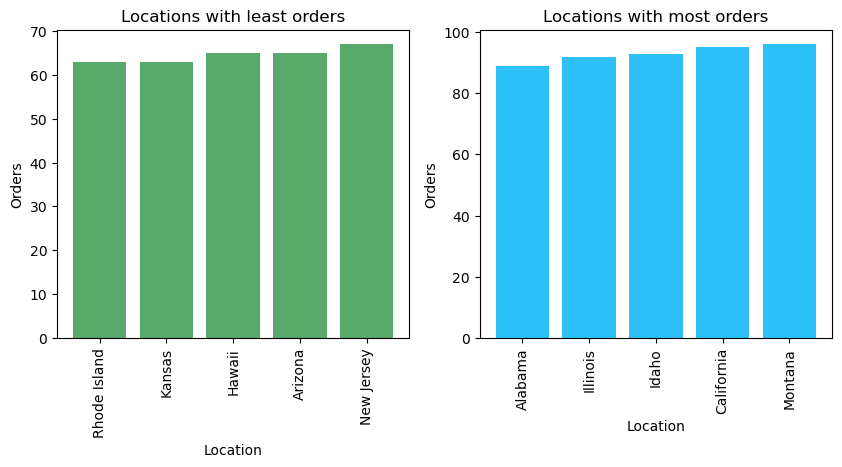

In [17]:
orders_per_location_plot = plt.figure(num=2, figsize=(10,4))
## Location with least orders
plt.subplot(1,2,1)
plt.bar(number_of_orders_per_location.head().index, height=number_of_orders_per_location.head(), color="#59A96A")
plt.xlabel("Location")
plt.ylabel("Orders")
plt.xticks(rotation ='vertical')
plt.title("Locations with least orders")

# Locations with most orders
plt.subplot(1,2,2)
plt.bar(number_of_orders_per_location.tail().index, height=number_of_orders_per_location.tail(), color="#2EC0F9")
plt.xlabel("Location")
plt.ylabel("Orders")
plt.xticks(rotation ='vertical')
plt.title("Locations with most orders")
plt.show()

### Preferred Payment Type v/s Payment type used while placing an order

In [19]:
preferred_payment_types = df["Preferred Payment Method"].value_counts().sort_values()
payment_type_used = df["Payment Method"].value_counts().sort_values()
print(preferred_payment_types, payment_type_used)

Preferred Payment Method
Bank Transfer    612
Venmo            634
Debit Card       636
Cash             670
Credit Card      671
PayPal           677
Name: count, dtype: int64 Payment Method
Bank Transfer    632
Debit Card       633
PayPal           638
Cash             648
Venmo            653
Credit Card      696
Name: count, dtype: int64


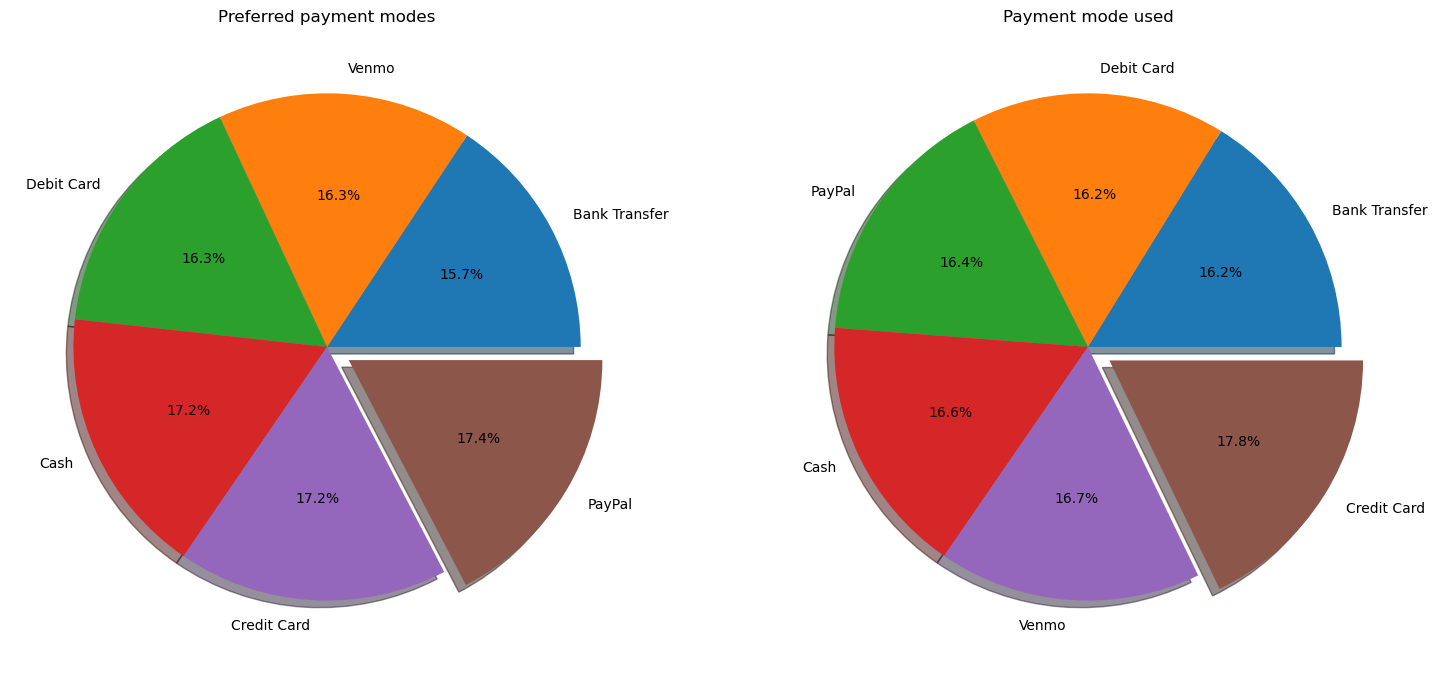

In [20]:
payment_mode_comparison_plot = plt.figure(num=3, figsize=(18,10))
plt.subplot(1,2,1)
plt.pie(preferred_payment_types, labels=preferred_payment_types.index.values, autopct="%1.1f%%", explode=(0,0,0,0,0,0.1), shadow=True)
plt.title("Preferred payment modes")

plt.subplot(1,2,2)
plt.pie(payment_type_used,labels=payment_type_used.index.values, autopct="%1.1f%%", explode=(0,0,0,0,0,0.1),shadow=True)
plt.title("Payment mode used")
plt.show()

#### How many user used their preferred payment method to place an order?

In [22]:
preferred_payment_mode_used = df["Payment Method"] == df["Preferred Payment Method"]
preferred_payment_mode_used.value_counts()

False    3283
True      617
Name: count, dtype: int64

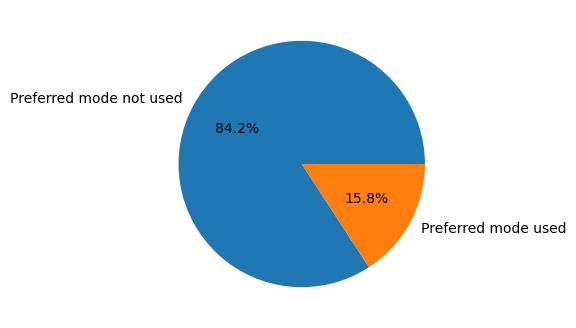

In [23]:
payment_mode_comparison_plot = plt.figure(num=4,figsize=(6, 4))
plt.pie(preferred_payment_mode_used.value_counts(), autopct="%1.1f%%", labels=["Preferred mode not used", "Preferred mode used"])
plt.show()

### Gender distribution of customers

In [25]:
gender_distibution = df["Gender"].value_counts()
gender_distibution

Gender
Male      2652
Female    1248
Name: count, dtype: int64

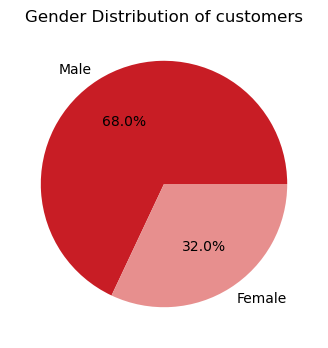

In [26]:
gender_distribution_plot = plt.figure(num=5, figsize=(4, 4))
plt.pie(gender_distibution, labels=gender_distibution.index.values, autopct="%1.1f%%", colors=["#C81D25", "#E78F8E"])
plt.title("Gender Distribution of customers")
plt.show()

### Locations with highers and lowest average order values

In [28]:
average_order_value_by_location = df.groupby("Location")["Purchase Amount (USD)"].agg("mean").sort_values(ascending=False)
average_order_value_by_location

Location
Alaska            67.597222
Pennsylvania      66.567568
Arizona           66.553846
West Virginia     63.876543
Nevada            63.379310
Washington        63.328767
North Dakota      62.891566
Virginia          62.883117
Utah              62.577465
Michigan          62.095890
Tennessee         61.974026
New Mexico        61.901235
Rhode Island      61.444444
Texas             61.194805
Arkansas          61.113924
Illinois          61.054348
Mississippi       61.037500
Massachusetts     60.888889
Iowa              60.884058
North Carolina    60.794872
Wyoming           60.690141
South Dakota      60.514286
New York          60.425287
Ohio              60.376623
Montana           60.250000
Idaho             60.075269
Nebraska          59.448276
New Hampshire     59.422535
Alabama           59.112360
California        59.000000
Indiana           58.924051
Georgia           58.797468
South Carolina    58.407895
Oklahoma          58.346667
Missouri          57.913580
Hawaii     

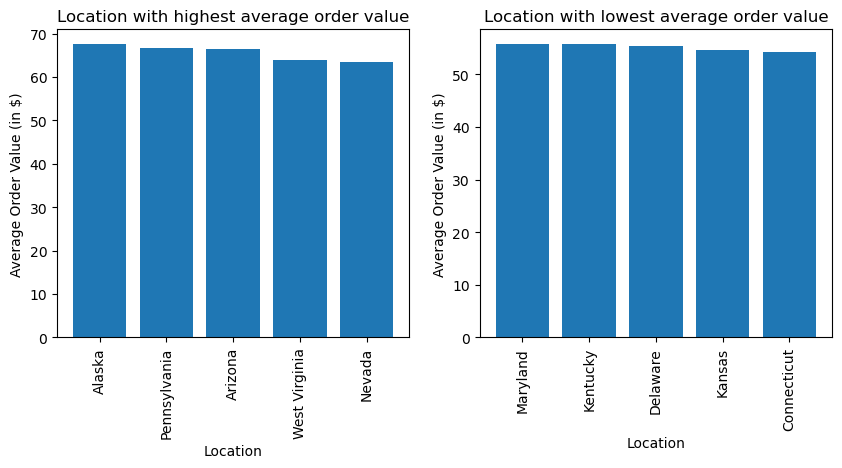

In [29]:
average_order_value_by_location_plot = plt.figure(num=6, figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(height=average_order_value_by_location.head(), x=average_order_value_by_location.head().index.values)
plt.xlabel("Location")
plt.ylabel("Average Order Value (in $)")
plt.xticks(rotation ='vertical')
plt.title("Location with highest average order value")

plt.subplot(1,2,2)
plt.bar(height=average_order_value_by_location.tail(), x=average_order_value_by_location.tail().index.values)
plt.xticks(rotation ='vertical')
plt.xlabel("Location")
plt.ylabel("Average Order Value (in $)")
plt.title("Location with lowest average order value")
plt.show()

### Distribution of Shipping types

In [31]:
shipping_types = df["Shipping Type"].value_counts()
print(shipping_types)

Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64


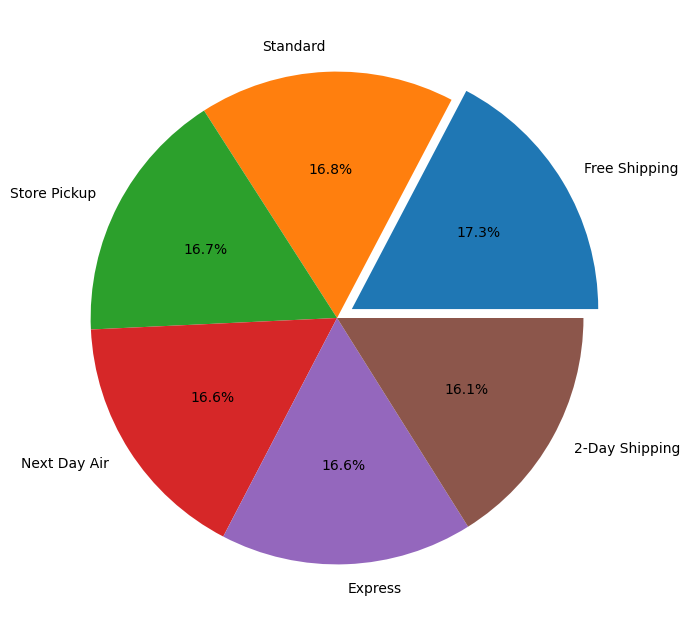

In [32]:
shipping_type_distribution_plot = plt.figure(num=7, figsize=(8,8))
plt.pie(shipping_types, labels=shipping_types.index.values, autopct="%1.1f%%", explode=(0.07,0,0,0,0, 0))
plt.title("")
plt.show()

### Average previous purchases made by locations 

In [34]:
average_purschases_by_location = df.groupby("Location")["Previous Purchases"].agg("mean").sort_values(ascending=False)
print(average_purschases_by_location)

Location
Hawaii            29.169231
Arizona           28.369231
Wyoming           28.239437
Missouri          28.148148
Alaska            28.097222
Iowa              27.608696
Alabama           27.449438
Pennsylvania      27.418919
Utah              27.169014
New Hampshire     27.098592
Arkansas          27.063291
Michigan          26.945205
Illinois          26.597826
Maryland          26.534884
Kentucky          26.417722
Minnesota         26.215909
Florida           26.132353
New Mexico        26.037037
Nevada            26.034483
Mississippi       26.012500
South Carolina    26.000000
Tennessee         25.961039
Indiana           25.822785
Oregon            25.513514
Montana           25.270833
Ohio              25.142857
Georgia           25.075949
North Carolina    24.769231
Nebraska          24.758621
Washington        24.698630
Delaware          24.627907
Vermont           24.600000
South Dakota      24.600000
California        24.494737
New York          24.241379
Idaho      

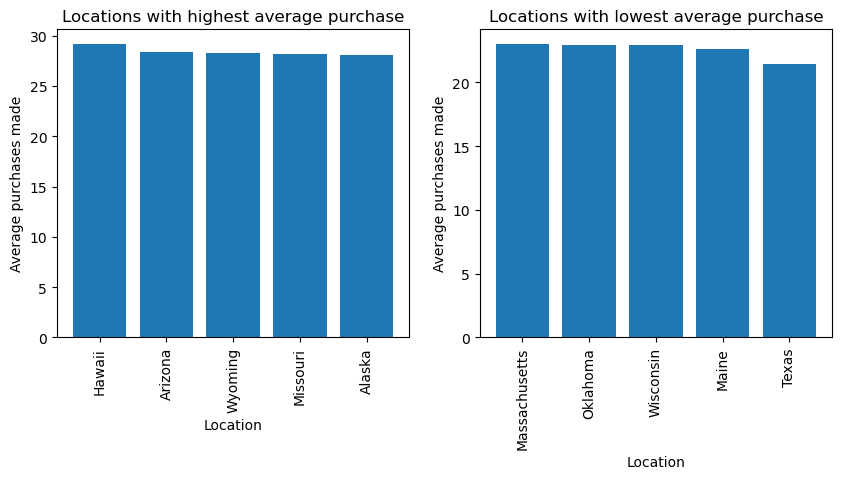

In [35]:
average_purchase_plot = plt.figure(num=8, figsize=(10, 4))
plt.subplot(1,2,1)
plt.bar(x=average_purschases_by_location.head().index.values, height=average_purschases_by_location.head())
plt.xticks(rotation='vertical')
plt.xlabel("Location")
plt.ylabel("Average purchases made")
plt.title("Locations with highest average purchase")

plt.subplot(1,2,2)
plt.bar(x=average_purschases_by_location.tail().index.values, height=average_purschases_by_location.tail())
plt.xticks(rotation='vertical')
plt.xlabel("Location")
plt.ylabel("Average purchases made")
plt.title("Locations with lowest average purchase")
plt.show()

### Discount usage distribution

In [37]:
discount_usage = df['Discount Applied'].value_counts()
discount_usage

Discount Applied
No     2223
Yes    1677
Name: count, dtype: int64

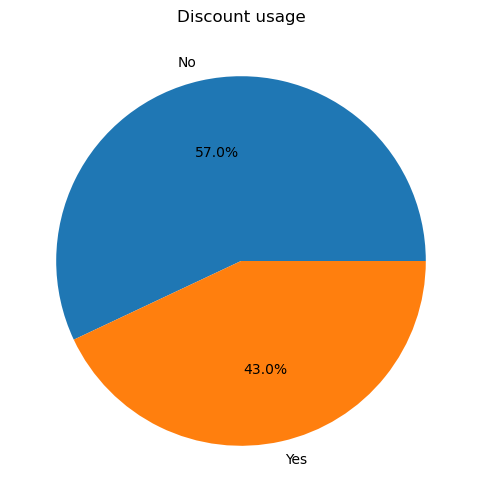

In [38]:
discount_usage_plot = plt.figure(num=9, figsize=(6,6))
plt.pie(discount_usage, labels=discount_usage.index.values, autopct='%1.1f%%')
plt.title("Discount usage")
plt.show()